# Chapter 4 Examples - R

In [1]:
#### Sytem may require the following: 
# sudo apt install libcurl4-openssl-dev
# sudo apt install libxml2-dev

#### Only need to run the folloing installs once
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", 
#                    "AICcmodavg", "ellipse", "asbio", "QuantPsyc", 
#                    "qpcR"))
install.packages("qqplotr")

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



## Load Libraries

In [2]:
suppressMessages(library(readxl))
suppressMessages(library(qpcR))
suppressMessages(library(ggplot2))
suppressMessages(library(qqplotr))
#suppressMessages(library(ggpubr))
#suppressMessages(library(tidyverse))
#suppressMessages(library(broom))
#suppressMessages(library(AICcmodavg))
#suppressMessages(library(ellipse))
#suppressMessages(library(asbio))
#suppressMessages(library(QuantPsyc))

## 4.1 - The Delivery Time Data

In [3]:
Delivery.table <- read_excel(
    '../linear_regression_5e_data_sets/Chapter 3/Examples/data-ex-3-1 (Delivery Time).xls')

Delivery.df <- data.frame(Delivery.table$`Delivery Time, y`, 
                              Delivery.table$`Number of Cases, x1`, 
                              Delivery.table$`Distance, x2 (ft)`)

colnames(Delivery.df) <- c("DeliveryTime", "NumberCases", "Distance")

head(Delivery.df)

,DeliveryTime,NumberCases,Distance
,<dbl>,<dbl>,<dbl>
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150
6,18.11,7,330


In [4]:
summary(Delivery.df)

  DeliveryTime    NumberCases       Distance     
 Min.   : 8.00   Min.   : 2.00   Min.   :  36.0  
 1st Qu.:13.75   1st Qu.: 4.00   1st Qu.: 150.0  
 Median :18.11   Median : 7.00   Median : 330.0  
 Mean   :22.38   Mean   : 8.76   Mean   : 409.3  
 3rd Qu.:21.50   3rd Qu.:10.00   3rd Qu.: 605.0  
 Max.   :79.24   Max.   :30.00   Max.   :1460.0  

In [5]:
Delivery.lm <- lm(
    DeliveryTime ~ NumberCases + Distance, 
    data=Delivery.df)  

print(Delivery.lm)


Call:
lm(formula = DeliveryTime ~ NumberCases + Distance, data = Delivery.df)

Coefficients:
(Intercept)  NumberCases     Distance  
    2.34123      1.61591      0.01438  



In [6]:
summary(Delivery.lm)


Call:
lm(formula = DeliveryTime ~ NumberCases + Distance, data = Delivery.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
NumberCases 1.615907   0.170735   9.464 3.25e-09 ***
Distance    0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


In [7]:
anova(Delivery.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
NumberCases,1,5382.4088,5382.40880,506.61936,1.112549e-16
Distance,1,168.4021,168.40213,15.85085,6.312469e-04
Residuals,22,233.7317,10.62417,NA,NA


In [8]:
Delivery.lm.Mres <- anova(Delivery.lm)[[3]][3]

### Various Residual Derivations (as defined by Montgomer/Peck/Vining)

In [9]:
# Residuals
Delivery.Residuals <- resid(Delivery.lm)
Delivery.Residuals_2 <- Delivery.lm$residuals

# Check equivalency
all.equal(Delivery.Residuals, Delivery.Residuals_2)

[1] TRUE

In [10]:
# Standardized Residuals
Delivery.StandardizedResiduals <- resid(Delivery.lm) / sqrt(anova(Delivery.lm)[[3]][3])


In [11]:
Delivery.X <- as.matrix(cbind(1,Delivery.df[2:3]))

In [12]:
# Hat Matrix Diagonal
Delivery.HatMatrixDiagonals <- diag(Delivery.X %*% solve(t(Delivery.X) %*% Delivery.X) %*% t(Delivery.X))
Delivery.HatMatrixDiagonals_2 <- unname(influence(Delivery.lm)$hat)

all.equal(Delivery.HatMatrixDiagonals, Delivery.HatMatrixDiagonals_2)

[1] TRUE

In [13]:
# Studentized Residuals
Delivery.StudentizedResiduals <- Delivery.Residuals / sqrt(Delivery.lm.Mres * (1 - Delivery.HatMatrixDiagonals))
Delivery.StudentizedResiduals_2 <- rstandard(Delivery.lm)

# Check equivaliency
all.equal(Delivery.StudentizedResiduals, Delivery.StudentizedResiduals_2)

[1] TRUE

In [14]:
# PRESS Residual
Delivery.PRESSResiduals <- unname(Delivery.Residuals / (1 - Delivery.HatMatrixDiagonals))
Delivery.PRESSResiduals_2 <- PRESS(Delivery.lm, verbose = FALSE)$residuals

all.equal(Delivery.PRESSResiduals, Delivery.PRESSResiduals_2)

[1] TRUE

In [15]:
# R-student Residual
Delivery.n = nrow(Delivery.df)
Delivery.p = ncol(Delivery.df)
S_sub_i_squared = (
        (Delivery.n - Delivery.p) * Delivery.lm.Mres - Delivery.Residuals^2 / (1 - Delivery.HatMatrixDiagonals)
    ) / (
        (Delivery.n - Delivery.p - 1)
    )
Delivery.RStudentResiduals <- Delivery.Residuals / sqrt(S_sub_i_squared * (1 - Delivery.HatMatrixDiagonals))
Delivery.RStudentResiduals_2 <- rstudent(Delivery.lm)

all.equal(Delivery.RStudentResiduals, Delivery.RStudentResiduals_2)

[1] TRUE

In [16]:
# PRESS Residual squared
Delivery.PRESSResidualsSqrd <- Delivery.PRESSResiduals^2

In [17]:
Delivery.Residual_df <- data.frame(
    unname(Delivery.Residuals),
    unname(Delivery.StandardizedResiduals),
    unname(Delivery.StudentizedResiduals),
    Delivery.HatMatrixDiagonals,
    Delivery.PRESSResiduals,
    Delivery.RStudentResiduals,
    Delivery.PRESSResidualsSqrd
)

In [18]:
colnames(Delivery.Residual_df) <- c(
    "Residuals",
    "StandardizedResiduals",
    "StudentizedResiduals", 
    "HatMatrixDiagonals", 
    "PRESSResiduals", 
    "RStudentResiduals", 
    "PRESSResidualsSqrd"
)

In [19]:
head(Delivery.Residual_df)

,Residuals,StandardizedResiduals,StudentizedResiduals,HatMatrixDiagonals,PRESSResiduals,RStudentResiduals,PRESSResidualsSqrd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-5.0280843,-1.54260631,-1.62767993,0.10180178,-5.59796734,-1.69562881,31.337238364
2,1.1463854,0.35170879,0.36484267,0.07070164,1.23360321,0.35753764,1.521776888
3,-0.0497937,-0.01527661,-0.01609165,0.09873476,-0.05524867,-0.01572177,0.003052415
4,4.9243539,1.51078203,1.57972040,0.08537479,5.38401290,1.63916491,28.987594871
5,-0.4443983,-0.13634053,-0.14176094,0.07501050,-0.48043610,-0.13856493,0.230818843
6,-0.2895743,-0.08884082,-0.09080847,0.04286693,-0.30254339,-0.08873728,0.091532503


In [21]:
# PRESS Residual Summary
Delivery.PRESSResidualsStat <- PRESS(Delivery.lm, verbose = FALSE)$stat
Delivery.PRESSResidualsStat_2 <- sum(Delivery.PRESSResidualsSqrd)

all.equal(Delivery.PRESSResidualsStat, Delivery.PRESSResidualsStat_2)

[1] TRUE

## 4.2 - The Delivery Time Data

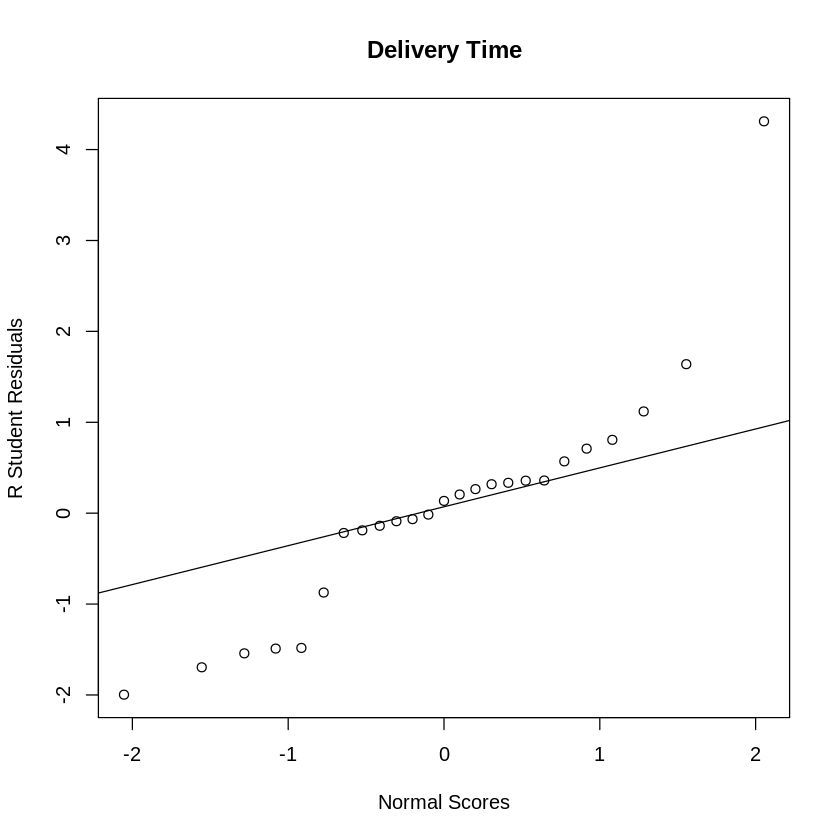

In [22]:
qqnorm(Delivery.RStudentResiduals,
       ylab="R Student Residuals",
       xlab="Normal Scores",
       main="Delivery Time"
       #, datax=TRUE
)
qqline(Delivery.RStudentResiduals)

## 4.3 - The Delivery Time Data

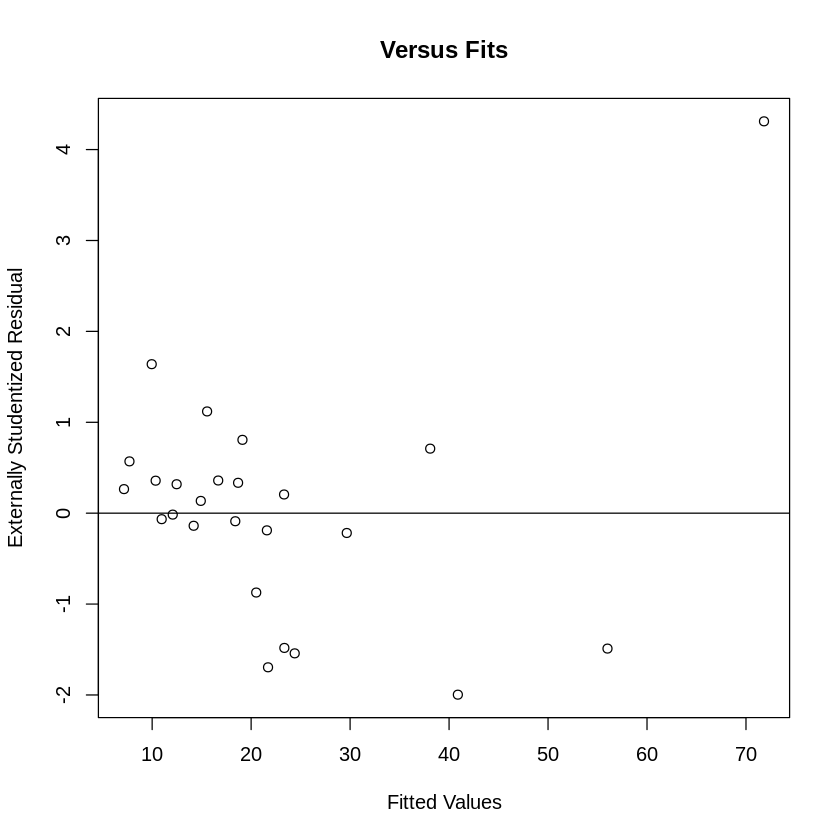

In [25]:
plot(
    fitted(Delivery.lm), 
    Delivery.Residual_df$RStudentResiduals,
    xlab="Fitted Values",
    ylab="Externally Studentized Residual",
    main="Versus Fits"
)
abline(h=0)

## 4.4 - The Delivery Time Data

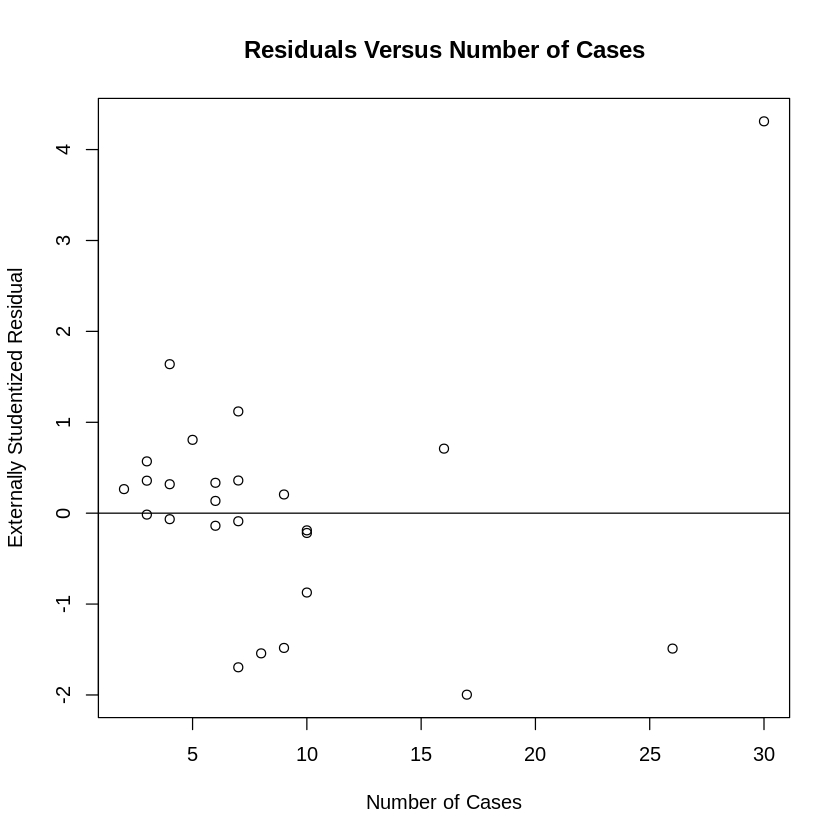

In [26]:
plot(
    Delivery.df$NumberCases, 
    Delivery.Residual_df$RStudentResiduals,
    xlab="Number of Cases",
    ylab="Externally Studentized Residual",
    main="Residuals Versus Number of Cases"
)
abline(h=0)

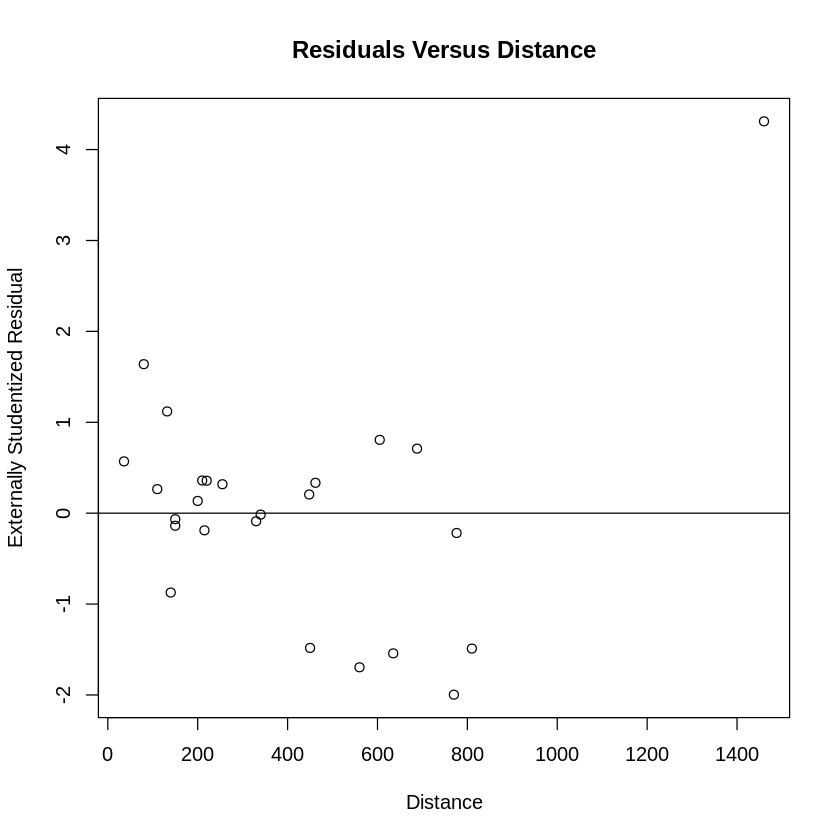

In [27]:
plot(
    Delivery.df$Distance, 
    Delivery.Residual_df$RStudentResiduals,
    xlab="Distance",
    ylab="Externally Studentized Residual",
    main="Residuals Versus Distance"
)
abline(h=0)

## 4.5 - The Delivery Time Data

In [33]:
CasesPartialRegressionA.lm <- lm(Delivery.df$DeliveryTime ~ Delivery.df$Distance)
CasesPartialRegressionA.Residuals <- resid(CasesPartialRegressionA.lm)
CasesPartialRegressionB.lm <- lm(Delivery.df$NumberCases ~ Delivery.df$Distance)
CasesPartialRegressionB.Residuals <- resid(CasesPartialRegressionB.lm)

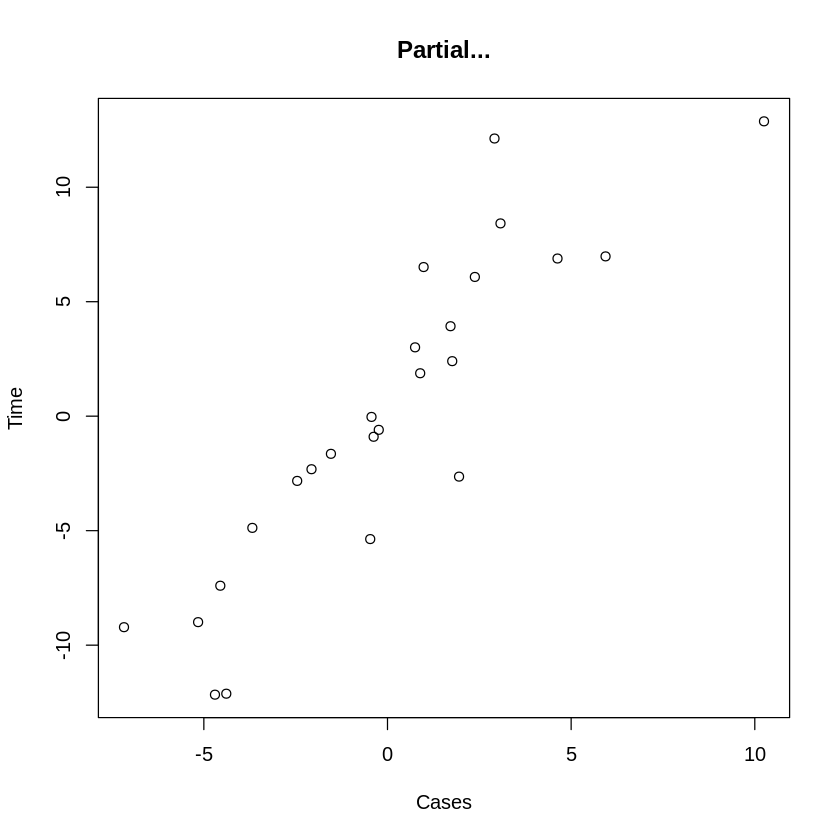

In [36]:
plot(
    CasesPartialRegressionB.Residuals, 
    CasesPartialRegressionA.Residuals,
    xlab="Cases",
    ylab="Time",
    main="Partial..."
)

In [37]:
DistancePartialRegressionA.lm <- lm(Delivery.df$DeliveryTime ~ Delivery.df$NumberCases)
DistancePartialRegressionA.Residuals <- resid(DistancePartialRegressionA.lm)
DistancePartialRegressionB.lm <- lm(Delivery.df$Distance ~ Delivery.df$NumberCases)
DistancePartialRegressionB.Residuals <- resid(DistancePartialRegressionB.lm)

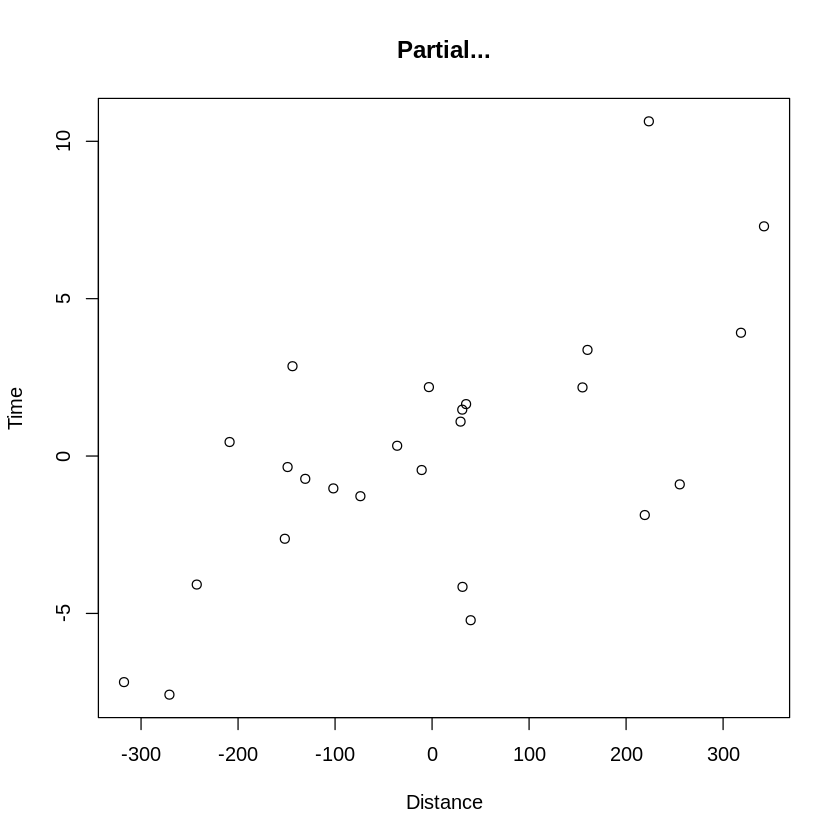

In [38]:
plot(
    DistancePartialRegressionB.Residuals, 
    DistancePartialRegressionA.Residuals,
    xlab="Distance",
    ylab="Time",
    main="Partial..."
)

## 4.6 - The Delivery Time Data